In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import sys
sys.path.append("..")
import logistic_regression as LR

from code_misc.utils import MyUtils

In [18]:
# from test_logistic_real_world.ipynb
data_set = 'ionosphere'

# READ in data
df_X_train = pd.read_csv(data_set+'/'+'X_train.csv', header=None)
df_y_train = pd.read_csv(data_set+'/'+'y_train.csv', header=None)
df_X_test = pd.read_csv(data_set+'/'+'X_test.csv', header=None)
df_y_test = pd.read_csv(data_set+'/'+'y_test.csv', header=None)

# save in numpy arrays
X_train = df_X_train.to_numpy()
y_train = df_y_train.to_numpy()
X_test = df_X_test.to_numpy()
y_test = df_y_test.to_numpy()

# get training set size
n_train = X_train.shape[0]

# normalize all features to [0,1] or [-1,1]
if data_set == 'ionosphere':
    X_all = MyUtils.normalize_neg1_pos1(np.concatenate((X_train, X_test), axis=0))


X_train = X_all[:n_train]
X_test = X_all[n_train:]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(280, 34)
(280, 1)
(71, 34)
(71, 1)


In [19]:
# build the model
log = LR.LogisticRegression()
# log.fit(X_train, y_train, lam = lam, eta = eta, iterations = 10000, SGD = True, mini_batch_size = mbs, degree = z_r)


# TEST GRADIENT DESCENT

In [93]:
# print('misclassfied percentage from training: ', log.error(X_train, y_train)/X_train.shape[0])
# print('misclassfied percentage from validation: ', log.error(X_test, y_test)/X_test.shape[0])
lamVals = [0,10]
z_rVals = [1,2]
etaVals = [0.01,0.001]

test_error = []
for lam in lamVals:
        for z_r in z_rVals:
            for eta in etaVals:
                log = LR.LogisticRegression() #Create a new lr object each time. No assumption made that the weights will reset.
                log.fit(X_train, y_train, lam = lam, eta = eta, iterations = 10000, SGD = False, mini_batch_size = 20, degree = z_r)
                # train_error = log.error(X_train, y_train)
                test_error.append(log.error(X_test, y_test)/X_test.shape[0])


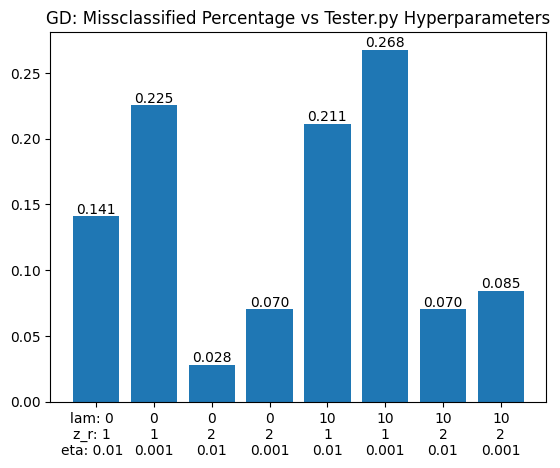

In [94]:
fig, ax = plt.subplots()
# xLabels = ['0\n1\n0.01','0\n1\n0.001','0,\n2,\n0.01','0,\n2,\n0.001','10,\n1,\n0.01','10,\n1,\n0.001','10,\n2,\n0.01','10,\n2,\n0.001']
xLabels = ['lam: 0  \nz_r: 1  \neta: 0.01  ','0\n1\n0.001', '0\n2\n0.01','0\n2\n0.001','10\n1\n0.01','10\n1\n0.001','10\n2\n0.01','10\n2\n0.001']
yLabels = ['0%','20%','40%','60%','80%','100%']
yLabels = np.arange(0,100,20)
plt.yticks = ['0%','20%','40%','60%','80%','100%']
plt.yticks = np.arange(0,100,20)
ax.bar(xLabels, test_error)

for x,y in zip(xLabels,test_error):

    label = "{:.3f}".format(y)
    
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.title("GD: Missclassified Percentage vs Tester.py Hyperparameters")
plt.show()

In [95]:
# # plt.plot(test_error)
# plt.scatter(test_error,np.arange(0,1,0.125))
# # plt.scatter(test_error,range(0,len(test_error)))
# plt.ylabel("% miscalculated")
# print(test_error)
# xLabels = ['0\n1\n0.01','0\n1\n0.001', '0\n2\n0.01','0\n2\n0.001','10\n1\n0.01','10\n1\n0.001','10\n2\n0.01','10\n2\n0.001']



GD test etas

In [99]:
lamVals = [0,2,4]
z_rVals = [2,3]
etaVals = [0.006,0.01,0.014]

test_error = []
for lam in lamVals:
        for z_r in z_rVals:
            for eta in etaVals:
                log = LR.LogisticRegression() #Create a new lr object each time. No assumption made that the weights will reset.
                log.fit(X_train, y_train, lam = lam, eta = eta, iterations = 10000, SGD = False, mini_batch_size = 20, degree = z_r)
                # train_error = log.error(X_train, y_train)
                test_error.append(log.error(X_test, y_test)/X_test.shape[0])

print(test)


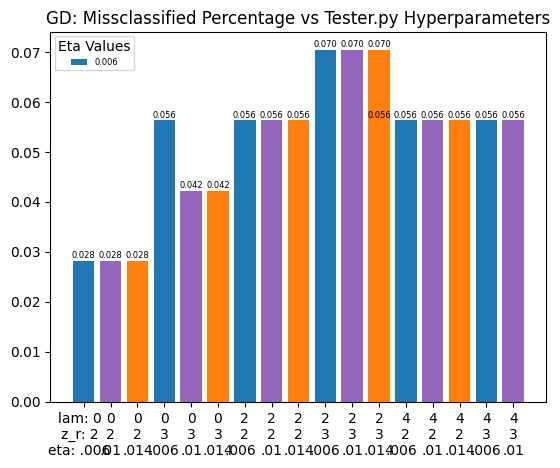

In [146]:
fig, ax = plt.subplots()
# xLabels = ['0\n1\n0.01','0\n1\n0.001','0,\n2,\n0.01','0,\n2,\n0.001','10,\n1,\n0.01','10,\n1,\n0.001','10,\n2,\n0.01','10,\n2,\n0.001']
xLabels = ['lam: 0  \nz_r: 2  \neta: .006  ','0\n2\n.01', '0\n2\n.014','0\n3\n.006','0\n3\n.01','0\n3\n.014',
           '2\n2\n.006  ','2\n2\n.01', '2\n2\n.014','2\n3\n.006','2\n3\n.01','2\n3\n.014',
           '4\n2\n.006  ','4\n2\n.01', '4\n2\n.014','4\n3\n.006','4\n3\n.01','2\n3\n.014',
           ]
bar_labels = [0.006,0.01,0.014]
bar_colors = ['tab:blue','tab:purple','tab:orange']
# yLabels = ['0%','20%','40%','60%','80%','100%']
# yLabels = np.arange(0,100,20)
# plt.yticks = ['0%','20%','40%','60%','80%','100%']
# plt.yticks = np.arange(0,100,20)
ax.bar(xLabels, test_error, color=bar_colors)


for x,y in zip(xLabels,test_error):

    label = "{:.3f}".format(y)
    
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center',
                 fontsize=6)
                 
    
plt.title("GD: Missclassified Percentage vs Tester.py Hyperparameters")
ax.legend(title='Eta Values', loc='upper left', labels=bar_labels, fontsize=6)
plt.show()

In [157]:
lamVals = [0,0.01,0.1]
# z_rVals = [2,3]
etaVals = [0.005,0.01,0.015,0.02]

test_error = []
for lam in lamVals:
        # for z_r in z_rVals:
        for eta in etaVals:
            log = LR.LogisticRegression() #Create a new lr object each time. No assumption made that the weights will reset.
            log.fit(X_train, y_train, lam = lam, eta = eta, iterations = 10000, SGD = False, mini_batch_size = 20, degree = 2)
            # train_error = log.error(X_train, y_train)
            test_error.append(log.error(X_test, y_test)/X_test.shape[0])



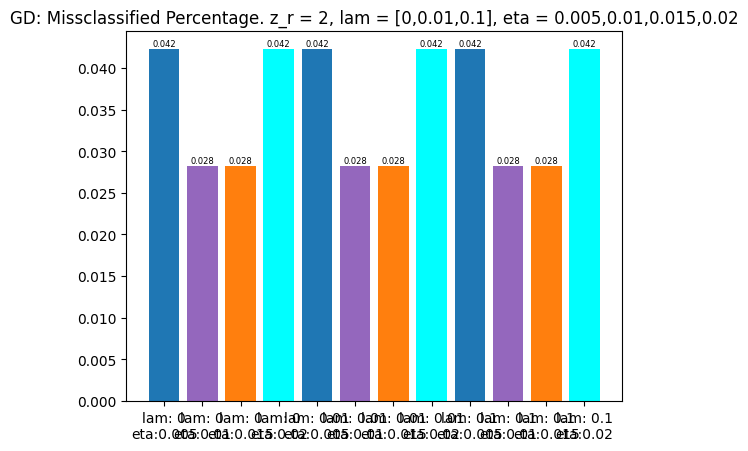

In [160]:
fig, ax = plt.subplots()
# xLabels = ['0\n1\n0.01','0\n1\n0.001','0,\n2,\n0.01','0,\n2,\n0.001','10,\n1,\n0.01','10,\n1,\n0.001','10,\n2,\n0.01','10,\n2,\n0.001']
# xLabels = ['lam: 0  \nz_r: 2  \neta: .006  ','0\n2\n.01', '0\n2\n.014','0\n3\n.006','0\n3\n.01','0\n3\n.014',
#            '2\n2\n.006  ','2\n2\n.01', '2\n2\n.014','2\n3\n.006','2\n3\n.01','2\n3\n.014',
#            '4\n2\n.006  ','4\n2\n.01', '4\n2\n.014','4\n3\n.006','4\n3\n.01','2\n3\n.014',
#            ]
xLabels = ['lam: 0\neta:0.005', 'lam: 0\neta:0.01', 'lam: 0\neta:0.015', 'lam: 0\neta:0.02',
           'lam: 0.01\neta:0.005', 'lam: 0.01\neta:0.01', 'lam: 0.01\neta:0.015', 'lam: 0.01\neta:0.02',
           'lam: 0.1\neta:0.005', 'lam: 0.1\neta:0.01', 'lam: 0.1\neta:0.015', 'lam: 0.1\neta:0.02']

bar_colors = ['tab:blue','tab:purple','tab:orange','cyan',]
# yLabels = ['0%','20%','40%','60%','80%','100%']
# yLabels = np.arange(0,100,20)
# plt.yticks = ['0%','20%','40%','60%','80%','100%']
# plt.yticks = np.arange(0,100,20)
ax.bar(xLabels, test_error, color=bar_colors)


for x,y in zip(xLabels,test_error):

    label = "{:.3f}".format(y)
    
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center',
                 fontsize=6)
                 
    
plt.title("GD: Missclassified Percentage. z_r = 2, lam = [0,0.01,0.1], eta = 0.005,0.01,0.015,0.02")
# ax.legend(title='Eta Values', loc='upper left', labels=bar_labels, fontsize=6)
plt.show()

# TEST STOCHASTIC GRADIENT DESCENT

In [147]:
# print('misclassfied percentage from training: ', log.error(X_train, y_train)/X_train.shape[0])
# print('misclassfied percentage from validation: ', log.error(X_test, y_test)/X_test.shape[0])
lamVals = [0,.5,1]
z_rVals = [2,3]
etaVals = [.006,.01,.014]

test_error = []
for lam in lamVals:
        for z_r in z_rVals:
            for eta in etaVals:
                log = LR.LogisticRegression() #Create a new lr object each time. No assumption made that the weights will reset.
                log.fit(X_train, y_train, lam = lam, eta = eta, iterations = 10000, SGD = True, mini_batch_size = 20, degree = z_r)
                # train_error = log.error(X_train, y_train)
                test_error.append(log.error(X_test, y_test)/X_test.shape[0])

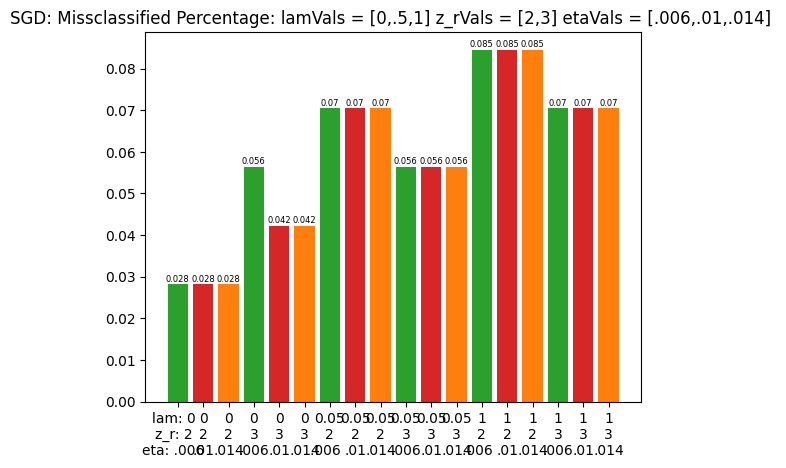

[0.028169014084507043, 0.028169014084507043, 0.028169014084507043, 0.056338028169014086, 0.04225352112676056, 0.04225352112676056, 0.07042253521126761, 0.07042253521126761, 0.07042253521126761, 0.056338028169014086, 0.056338028169014086, 0.056338028169014086, 0.08450704225352113, 0.08450704225352113, 0.08450704225352113, 0.07042253521126761, 0.07042253521126761, 0.07042253521126761]


In [151]:
fig, ax = plt.subplots()
# xLabels = ['0\n1\n0.01','0\n1\n0.001','0,\n2,\n0.01','0,\n2,\n0.001','10,\n1,\n0.01','10,\n1,\n0.001','10,\n2,\n0.01','10,\n2,\n0.001']
xLabels = ['lam: 0  \nz_r: 2  \neta: .006  ','0\n2\n.01', '0\n2\n.014','0\n3\n.006','0\n3\n.01','0\n3\n.014',
           '0.05\n2\n.006  ','0.05\n2\n.01', '0.05\n2\n.014','0.05\n3\n.006','0.05\n3\n.01','0.05\n3\n.014',
           '1\n2\n.006  ','1\n2\n.01', '1\n2\n.014','1\n3\n.006','1\n3\n.01','1\n3\n.014',
           ]
bar_colors = ['tab:green','tab:red','tab:orange']
ax.bar(xLabels, test_error, color = bar_colors)


for x,y in zip(xLabels,test_error):

    label = "{:.2}".format(y)
    
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center',
                 fontsize=6) # horizontal alignment can be left, right or center
plt.title("SGD: Missclassified Percentage: lamVals = [0,.5,1] z_rVals = [2,3] etaVals = [.006,.01,.014] ")
plt.show()
print(test_error)

SGD Round 3


In [161]:
# print('misclassfied percentage from training: ', log.error(X_train, y_train)/X_train.shape[0])
# print('misclassfied percentage from validation: ', log.error(X_test, y_test)/X_test.shape[0])
lamVals = [0,.01]
mbsVals = [10,20,30]
iterVals = [1000,10000,50000]

test_error = []
for lam in lamVals:
        for mbs in mbsVals:
            for it in iterVals:
                log = LR.LogisticRegression() #Create a new lr object each time. No assumption made that the weights will reset.
                log.fit(X_train, y_train, lam = lam, eta = 0.01, iterations = it, SGD = True, mini_batch_size = 20, degree = 2)
                # train_error = log.error(X_train, y_train)
                test_error.append(log.error(X_test, y_test)/X_test.shape[0])

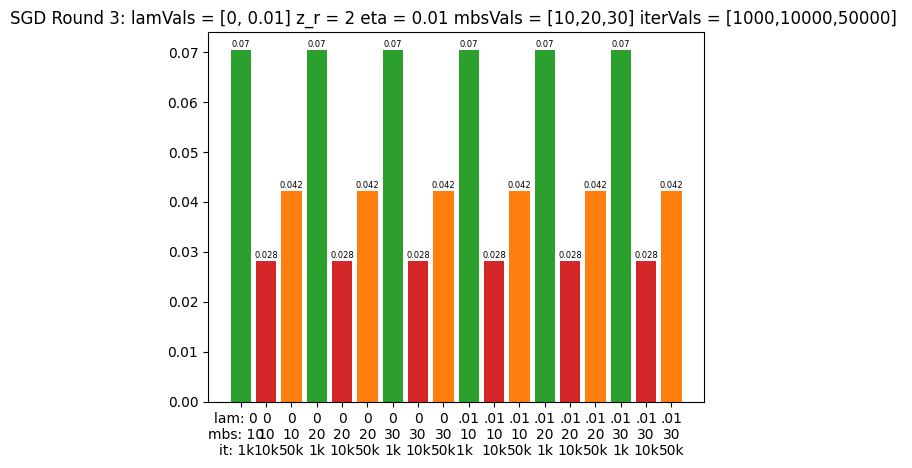

[0.07042253521126761, 0.028169014084507043, 0.04225352112676056, 0.07042253521126761, 0.028169014084507043, 0.04225352112676056, 0.07042253521126761, 0.028169014084507043, 0.04225352112676056, 0.07042253521126761, 0.028169014084507043, 0.04225352112676056, 0.07042253521126761, 0.028169014084507043, 0.04225352112676056, 0.07042253521126761, 0.028169014084507043, 0.04225352112676056]


In [163]:
fig, ax = plt.subplots()
# xLabels = ['0\n1\n0.01','0\n1\n0.001','0,\n2,\n0.01','0,\n2,\n0.001','10,\n1,\n0.01','10,\n1,\n0.001','10,\n2,\n0.01','10,\n2,\n0.001']
xLabels = ['lam: 0  \nmbs: 10  \nit: 1k  ','0\n10\n10k','0\n10\n20k','0\n20\n1k','0\n20\n10k','0\n20\n50k','0\n30\n1k','0\n30\n10k','0\n30\n50k',
           '.01\n10\n1k  ','.01\n10\n10k', '.01\n10\n50k','.01\n20\n1k','.01\n20\n10k','.01\n20\n50k','.01\n30\n1k','.01\n30\n10k','.01\n30\n50k']
bar_colors = ['tab:green','tab:red','tab:orange']
ax.bar(xLabels, test_error, color = bar_colors)


for x,y in zip(xLabels,test_error):

    label = "{:.2}".format(y)
    
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center',
                 fontsize=6) # horizontal alignment can be left, right or center
plt.title("SGD Round 3: lamVals = [0, 0.01] z_r = 2 eta = 0.01 mbsVals = [10,20,30] iterVals = [1000,10000,50000] ")
plt.show()
print(test_error)

SGD round 3.5

In [165]:
# print('misclassfied percentage from training: ', log.error(X_train, y_train)/X_train.shape[0])
# print('misclassfied percentage from validation: ', log.error(X_test, y_test)/X_test.shape[0])
lamVals = [0,0.2]
mbsVals = [2,20,200]
iterVals = [8000,10000,20000]

test_error = []
for lam in lamVals:
        for mbs in mbsVals:
            for it in iterVals:
                log = LR.LogisticRegression() #Create a new lr object each time. No assumption made that the weights will reset.
                log.fit(X_train, y_train, lam = lam, eta = 0.01, iterations = it, SGD = True, mini_batch_size = 20, degree = 2)
                # train_error = log.error(X_train, y_train)
                test_error.append(log.error(X_test, y_test)/X_test.shape[0])

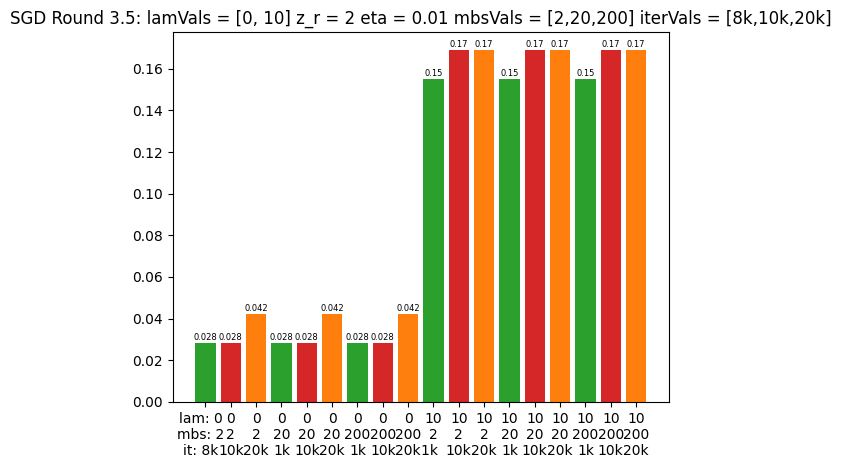

[0.028169014084507043, 0.028169014084507043, 0.04225352112676056, 0.028169014084507043, 0.028169014084507043, 0.04225352112676056, 0.028169014084507043, 0.028169014084507043, 0.04225352112676056, 0.15492957746478872, 0.16901408450704225, 0.16901408450704225, 0.15492957746478872, 0.16901408450704225, 0.16901408450704225, 0.15492957746478872, 0.16901408450704225, 0.16901408450704225]


In [168]:
fig, ax = plt.subplots()
# xLabels = ['0\n1\n0.01','0\n1\n0.001','0,\n2,\n0.01','0,\n2,\n0.001','10,\n1,\n0.01','10,\n1,\n0.001','10,\n2,\n0.01','10,\n2,\n0.001']
# xLabels = ['lam: 0  \nmbs: 10  \nit: 1k  ','0\n10\n10k','0\n10\n50k','0\n20\n1k','0\n20\n10k','0\n20\n50k','0\n30\n1k','0\n30\n10k','0\n30\n50k',
#            '.01\n10\n1k  ','.01\n10\n10k', '.01\n10\n50k','.01\n20\n1k','.01\n20\n10k','.01\n20\n50k','.01\n30\n1k','.01\n30\n10k','.01\n30\n50k']
xLabels = ['lam: 0  \nmbs: 2  \nit: 8k  ','0\n2\n10k','0\n2\n20k','0\n20\n1k','0\n20\n10k','0\n20\n20k','0\n200\n1k','0\n200\n10k','0\n200\n20k',
           '0.2\n2\n1k  ','0.2\n2\n10k', '0.2\n2\n20k','0.2\n20\n1k','0.2\n20\n10k','0.2\n20\n20k','0.2\n200\n1k','0.2\n200\n10k','0.2\n200\n20k']
bar_colors = ['tab:green','tab:red','tab:orange']
ax.bar(xLabels, test_error, color = bar_colors)


for x,y in zip(xLabels,test_error):

    label = "{:.2}".format(y)
    
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center',
                 fontsize=6) # horizontal alignment can be left, right or center
plt.title("SGD Round 3.5: lamVals = [0, 10] z_r = 2 eta = 0.01 mbsVals = [2,20,200] iterVals = [8k,10k,20k]")
plt.show()
print(test_error)

In [ ]:
# print('misclassfied percentage from training: ', log.error(X_train, y_train)/X_train.shape[0])
# print('misclassfied percentage from validation: ', log.error(X_test, y_test)/X_test.shape[0])
lamVals = [0,10]
mbsVals = [2,20,200]
iterVals = [8000,10000,20000]

test_error = []
for lam in lamVals:
        for mbs in mbsVals:
            for it in iterVals:
                log = LR.LogisticRegression() #Create a new lr object each time. No assumption made that the weights will reset.
                log.fit(X_train, y_train, lam = lam, eta = 0.01, iterations = it, SGD = True, mini_batch_size = 20, degree = 2)
                # train_error = log.error(X_train, y_train)
                test_error.append(log.error(X_test, y_test)/X_test.shape[0])

SGD Round 4

In [172]:
# print('misclassfied percentage from training: ', log.error(X_train, y_train)/X_train.shape[0])
# print('misclassfied percentage from validation: ', log.error(X_test, y_test)/X_test.shape[0])
lamVals = [0.1,0.3]

iterVals = [4000,6000,8000]

test_error = []
for lam in lamVals:
        # for mbs in mbsVals:
        for it in iterVals:
            log = LR.LogisticRegression() #Create a new lr object each time. No assumption made that the weights will reset.
            log.fit(X_train, y_train, lam = lam, eta = 0.01, iterations = it, SGD = True, mini_batch_size = 20, degree = 2)
            # train_error = log.error(X_train, y_train)
            test_error.append(log.error(X_test, y_test)/X_test.shape[0])

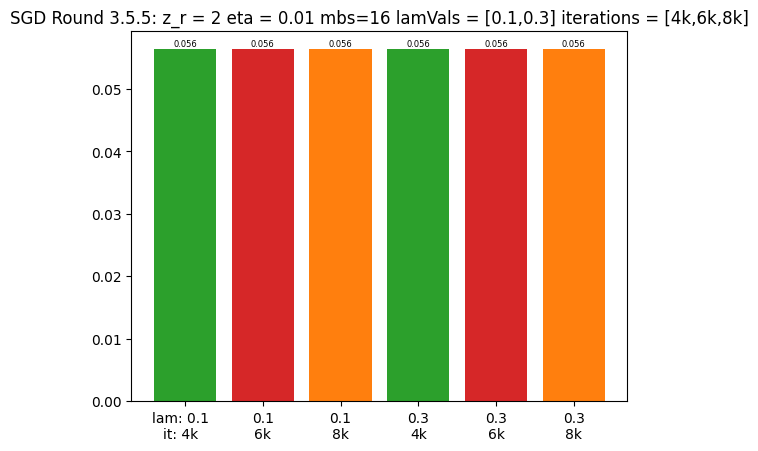

[0.056338028169014086, 0.056338028169014086, 0.056338028169014086, 0.056338028169014086, 0.056338028169014086, 0.056338028169014086]


In [173]:
fig, ax = plt.subplots()
# xLabels = ['0\n1\n0.01','0\n1\n0.001','0,\n2,\n0.01','0,\n2,\n0.001','10,\n1,\n0.01','10,\n1,\n0.001','10,\n2,\n0.01','10,\n2,\n0.001']
# xLabels = ['lam: 0  \nmbs: 10  \nit: 1k  ','0\n10\n10k','0\n10\n50k','0\n20\n1k','0\n20\n10k','0\n20\n50k','0\n30\n1k','0\n30\n10k','0\n30\n50k',
#            '.01\n10\n1k  ','.01\n10\n10k', '.01\n10\n50k','.01\n20\n1k','.01\n20\n10k','.01\n20\n50k','.01\n30\n1k','.01\n30\n10k','.01\n30\n50k']
# xLabels = ['lam: 0  \nmbs: 2  \nit: 8k  ','0\n2\n10k','0\n2\n20k','0\n20\n1k','0\n20\n10k','0\n20\n20k','0\n200\n1k','0\n200\n10k','0\n200\n20k',
#            '10\n2\n1k  ','10\n2\n10k', '10\n2\n20k','10\n20\n1k','10\n20\n10k','10\n20\n20k','10\n200\n1k','10\n200\n10k','10\n200\n20k']
xLabels = ['lam: 0.1  \nit: 4k  ','0.1\n6k','0.1\n8k','0.3\n4k','0.3\n6k','0.3\n8k']
bar_colors = ['tab:green','tab:red','tab:orange']
ax.bar(xLabels, test_error, color = bar_colors)


for x,y in zip(xLabels,test_error):

    label = "{:.2}".format(y)
    
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center',
                 fontsize=6) # horizontal alignment can be left, right or center
plt.title("SGD Round 3.5.5: z_r = 2 eta = 0.01 mbs=16 lamVals = [0.1,0.3] iterations = [4k,6k,8k]")
plt.show()
print(test_error)